In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
cmap = mpl.colormaps['viridis']
norm = mpl.colors.Normalize(vmin=0, vmax=8)

In [120]:
df = pd.read_csv('dataset_i5-9gen_with_cycles.csv', index_col=False)
df['unix']=0
df

,workload,cycles,cache-misses,instructions,cycle_activity.stalls_total,branch-misses,context-switches,iTLB-load-misses,IpCall,IpLoad,IpMispredict,BpTkBranch,MLP,unix
0,500.perlbench_r,8161831361,25741624,19244473297,1661700474,34112016,11,240354,98.45,3.64,439.30,2.03,1.39,0
1,500.perlbench_r,16524592463,51543983,39867315327,3238937052,74501671,19,395540,108.91,3.65,400.45,2.05,1.36,0
2,500.perlbench_r,24845507433,78831602,60442673577,4837212858,114823505,34,552608,112.42,3.65,389.37,2.06,1.35,0
3,500.perlbench_r,33099307131,104275450,81237734926,6379915775,155716591,42,705694,114.11,3.65,383.99,2.07,1.35,0
4,500.perlbench_r,41358873306,130200148,101910825510,7948209890,195524777,50,868384,115.31,3.65,399.80,2.07,1.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,554.roms_r,1806493514121,73615936564,1398024373244,1026184222415,177320584,2739,1499003,220.94,2.11,7993.82,1.31,4.61,0
4826,554.roms_r,1815268744457,73973130083,1404687079653,1031222974741,178269068,2753,1501838,220.79,2.11,7995.23,1.31,4.61,0
4827,554.roms_r,1824041720183,74321864813,1411754359980,1036107102054,179163699,2768,1506076,220.95,2.11,7993.38,1.31,4.61,0
4828,554.roms_r,1832819334257,74687181297,1417970975697,1041283979037,180007925,2784,1508837,220.76,2.11,7990.79,1.31,4.61,0


In [121]:
df.drop(['workload'], axis=1, inplace=True)
df

,cycles,cache-misses,instructions,cycle_activity.stalls_total,branch-misses,context-switches,iTLB-load-misses,IpCall,IpLoad,IpMispredict,BpTkBranch,MLP,unix
0,8161831361,25741624,19244473297,1661700474,34112016,11,240354,98.45,3.64,439.30,2.03,1.39,0
1,16524592463,51543983,39867315327,3238937052,74501671,19,395540,108.91,3.65,400.45,2.05,1.36,0
2,24845507433,78831602,60442673577,4837212858,114823505,34,552608,112.42,3.65,389.37,2.06,1.35,0
3,33099307131,104275450,81237734926,6379915775,155716591,42,705694,114.11,3.65,383.99,2.07,1.35,0
4,41358873306,130200148,101910825510,7948209890,195524777,50,868384,115.31,3.65,399.80,2.07,1.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,1806493514121,73615936564,1398024373244,1026184222415,177320584,2739,1499003,220.94,2.11,7993.82,1.31,4.61,0
4826,1815268744457,73973130083,1404687079653,1031222974741,178269068,2753,1501838,220.79,2.11,7995.23,1.31,4.61,0
4827,1824041720183,74321864813,1411754359980,1036107102054,179163699,2768,1506076,220.95,2.11,7993.38,1.31,4.61,0
4828,1832819334257,74687181297,1417970975697,1041283979037,180007925,2784,1508837,220.76,2.11,7990.79,1.31,4.61,0


In [129]:
# Separating features and target into numpy arrays

X=np.array(df.loc[:, 'cache-misses':'MLP'])
y=np.array(df['cycles']).reshape(-1, 1)

In [140]:
models = ['LR', 'DT', 'RF', 'XGB', 'KNN', 'MLP']
estimator = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(), KNeighborsRegressor(),
             MLPRegressor(max_iter=300)]

In [124]:
df7 = pd.read_csv('dataset_i5-9gen_unix.csv', index_col=False)
df7['unix'] = 1
df7

,workload,cycles,cache-misses,instructions,cycle_activity.stalls_total,branch-misses,context-switches,iTLB-load-misses,IpCall,IpLoad,IpMispredict,BpTkBranch,MLP,unix
0,execl,2039935440,1160946,2187009485,1225685907,8629186,234,903529,38.51,3.67,246.16,1.84,1.43,1
1,execl,6214510910,2735088,5148335387,2882208686,20284182,334,2102278,38.45,3.67,247.46,1.84,1.43,1
2,execl,10249061897,4069203,8706280462,4876587736,34304078,441,3644801,38.45,3.67,247.88,1.84,1.43,1
3,execl,14486897694,5356978,12311021012,6854531266,48518952,498,5136785,38.46,3.67,248.56,1.84,1.43,1
4,execl,18747079321,7060151,15892989007,8834879630,62650994,894,6586551,38.52,3.67,248.83,1.84,1.43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,shell16,1630662762470,5429156280,1492912284158,708476354349,6300742941,2804362,353460773,46.93,3.98,237.72,1.81,1.53,1
889,shell16,1647738502772,5486986538,1508719402113,715961452429,6367410599,2834116,357181811,46.93,3.98,237.71,1.81,1.53,1
890,shell16,1664684136198,5543810668,1524112848316,723311881116,6432537626,2863727,360870450,46.93,3.98,237.71,1.81,1.53,1
891,shell16,1681579019612,5600026995,1539387912353,730603307211,6497057442,2892317,364505957,46.93,3.98,237.71,1.81,1.53,1


In [125]:
unix_wkld={
    'execl':0,
    'pipe':1,
    'context1':2,
    'spawn':3,
    'syscall':4,
    'dhry2reg':5,
    'shell1':6,
    'shell8':7,
    'shell16':8
}
df7['wkld']=df7['workload']
df7=pd.get_dummies(df7, columns=['wkld'])
df7['workload']=df7['workload'].astype('category').map(unix_wkld)
df7

,workload,cycles,cache-misses,instructions,cycle_activity.stalls_total,branch-misses,context-switches,iTLB-load-misses,IpCall,IpLoad,...,unix,wkld_context1,wkld_dhry2reg,wkld_execl,wkld_pipe,wkld_shell1,wkld_shell16,wkld_shell8,wkld_spawn,wkld_syscall
0,0,2039935440,1160946,2187009485,1225685907,8629186,234,903529,38.51,3.67,...,1,0,0,1,0,0,0,0,0,0
1,0,6214510910,2735088,5148335387,2882208686,20284182,334,2102278,38.45,3.67,...,1,0,0,1,0,0,0,0,0,0
2,0,10249061897,4069203,8706280462,4876587736,34304078,441,3644801,38.45,3.67,...,1,0,0,1,0,0,0,0,0,0
3,0,14486897694,5356978,12311021012,6854531266,48518952,498,5136785,38.46,3.67,...,1,0,0,1,0,0,0,0,0,0
4,0,18747079321,7060151,15892989007,8834879630,62650994,894,6586551,38.52,3.67,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,8,1630662762470,5429156280,1492912284158,708476354349,6300742941,2804362,353460773,46.93,3.98,...,1,0,0,0,0,0,1,0,0,0
889,8,1647738502772,5486986538,1508719402113,715961452429,6367410599,2834116,357181811,46.93,3.98,...,1,0,0,0,0,0,1,0,0,0
890,8,1664684136198,5543810668,1524112848316,723311881116,6432537626,2863727,360870450,46.93,3.98,...,1,0,0,0,0,0,1,0,0,0
891,8,1681579019612,5600026995,1539387912353,730603307211,6497057442,2892317,364505957,46.93,3.98,...,1,0,0,0,0,0,1,0,0,0


In [126]:
# Separating features and target into numpy arrays

X7=np.array(df7.loc[:, 'cache-misses':'MLP'])
y7=np.array(df7['cycles']).reshape(-1, 1)

In [130]:
X75 = np.concatenate((X, X7))
X75.shape

(5723, 11)

Axis  Variance covered by PCA:
  1       20.687453
  2       16.652963
  3       12.800786
  4       11.674588
  5        8.887363
  6        8.528064
  7        7.648786
  8        4.621153
  9        4.399762
 10        3.043534


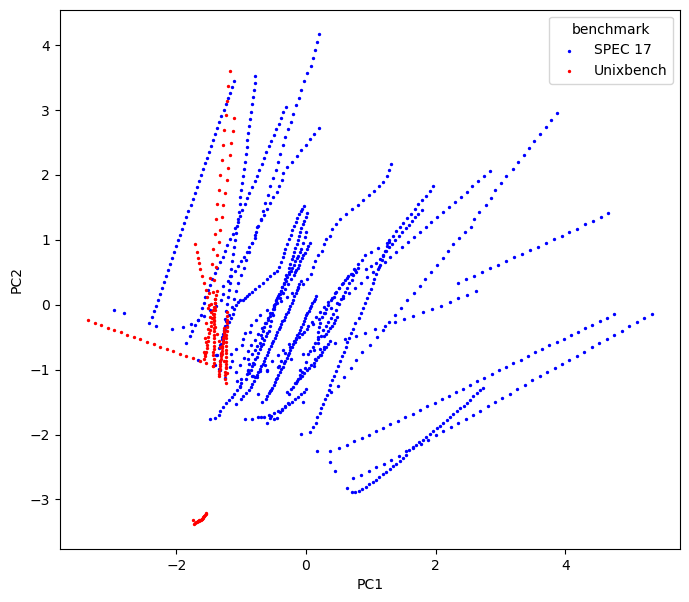

In [132]:
# Principal Component Analysis of 8500 & 6500 combined datasets

scaler = StandardScaler().fit(X75)
X75sc = scaler.transform(X75)          # Z-transform all column values
pca=PCA(n_components=X75.shape[1])
pca.fit(X75sc)
X75_pca=pca.transform(X75sc)
print("Axis  Variance covered by PCA:")
for i in range(10): print('%3d %15f'%(i+1, pca.explained_variance_ratio_[i]*100))
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
scatter1=ax.scatter(X75_pca[:4830:5, 0], X75_pca[:4830:5, 1], 2, 'b')
scatter2=ax.scatter(X75_pca[4830::5, 0], X75_pca[4830::5, 1], 2, 'r')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend([scatter1,scatter2],['SPEC 17','Unixbench'], title="benchmark", loc='upper right')

In [77]:
# Train on SPEC + 'x' rows of Unix, test on remaining Unix
lo, hi, jmp = 0, 201, 10             # training size range
iters = (hi-lo-1)//jmp + 1
score = np.zeros((iters, len(models)))
mae = np.zeros((iters, len(models)))
mse = np.zeros((iters, len(models)))
indices = np.arange(X7.shape[0])
train_idx, test_idx = np.zeros((0), dtype=np.int8), indices
for trs in range(iters):
    if trs > 0:
        trainpool_idx, test_idx = train_test_split(test_idx, train_size=jmp)
        train_idx = np.concatenate((train_idx, trainpool_idx))
    X75_train, y75_train = np.concatenate((X, X7[train_idx])), np.concatenate((y, y7[train_idx]))
    X7_test, y7_test = X7[test_idx], y7[test_idx]
    X_scaler, y_scaler = StandardScaler().fit(X75_train), StandardScaler().fit(y75_train)
    X75_train = np.concatenate((X_scaler.transform(X75_train), np.concatenate((df.iloc[:,-1:], df7.iloc[train_idx,-10:-9]))), axis=1)
    X7_test   = np.concatenate((X_scaler.transform(X7_test)  , df7.iloc[test_idx,-10:-9]), axis=1)
    y75_train, y7_test = y_scaler.transform(y75_train), y_scaler.transform(y7_test)
    print(X75_train.shape[0], X7_test.shape[0])
    
    for model in range(len(models)):
        e = estimator[model].fit(X75_train, y75_train.ravel())
        score[trs][model] = e.score(X7_test, y7_test)
        y_pred = e.predict(X7_test)
        mae[trs][model] = mean_absolute_error(y_true=y7_test, y_pred=y_pred)
        mse[trs][model] = mean_squared_error(y_true=y7_test, y_pred=y_pred)

4830 893
4840 883
4850 873
4860 863
4870 853
4880 843
4890 833
4900 823
4910 813
4920 803
4930 793
4940 783
4950 773
4960 763
4970 753
4980 743
4990 733
5000 723
5010 713
5020 703
5030 693


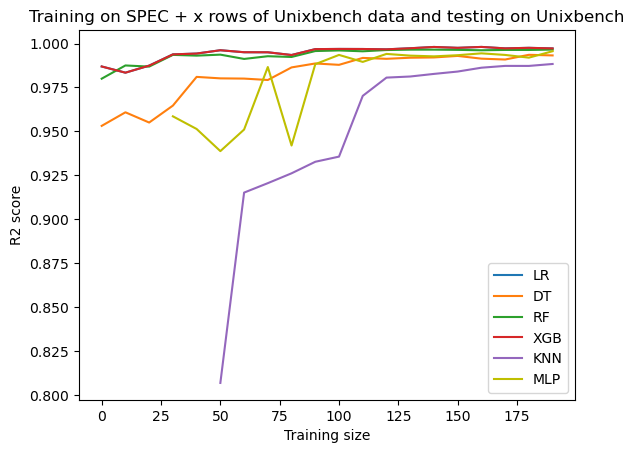

In [168]:
plt.plot(range(0, h, jmp), score[0//jmp:h//jmp, model], label=models[0])
for model in range(1, 4):
    plt.plot(range(l, h, jmp), score[l//jmp:h//jmp, model], label=models[model])
plt.plot(range(50, h, jmp), score[50//jmp:h//jmp, 4], label=models[4])
plt.plot(range(30, h, jmp), score[30//jmp:h//jmp, 5], label=models[5], color='y')
plt.legend(loc='lower right')
plt.title('Training on SPEC + x rows of Unixbench data and testing on Unixbench')
plt.xlabel('Training size')
plt.ylabel('R2 score')
plt.show()

In [174]:
score[:5, 3]

array([0.98693775, 0.98341817, 0.98742667, 0.9938181 , 0.99428829])

In [67]:
# Train on Unix + 'x' rows of SPEC, test on remaining SPEC
lo, hi, jmp = 0, 201, 10             # training size range
iters = (hi-lo-1)//jmp + 1
score1 = np.zeros((iters, len(models)))
mae1 = np.zeros((iters, len(models)))
mse1 = np.zeros((iters, len(models)))
indices = np.arange(X.shape[0])
train_idx, test_idx = np.zeros((0), dtype=np.int8), indices
for trs in range(iters):
    if trs > 0:
        trainpool_idx, test_idx = train_test_split(test_idx, train_size=jmp)
        train_idx = np.concatenate((train_idx, trainpool_idx))
    X57_train, y57_train = np.concatenate((X7, X[train_idx])), np.concatenate((y7, y[train_idx]))
    X_test, y_test = X[test_idx], y[test_idx]
    X_scaler, y_scaler = StandardScaler().fit(X57_train), StandardScaler().fit(y57_train)
    X57_train = np.concatenate((X_scaler.transform(X57_train), np.concatenate((df7.iloc[:,-10:-9], df.iloc[train_idx,-1:]))), axis=1)
    X_test    = np.concatenate((X_scaler.transform(X_test)  , df.iloc[test_idx,-1:]), axis=1)
    y57_train, y_test = y_scaler.transform(y57_train), y_scaler.transform(y_test)
    print(X57_train.shape[0], X_test.shape[0])
    
    for model in range(len(models)):
        e = estimator[model].fit(X57_train, y57_train.ravel())
        score1[trs][model] = e.score(X_test, y_test)
        y_pred = e.predict(X_test)
        mae1[trs][model] = mean_absolute_error(y_true=y_test, y_pred=y_pred)
        mse1[trs][model] = mean_squared_error(y_true=y_test, y_pred=y_pred)

893 4830
903 4820
913 4810
923 4800
933 4790
943 4780
953 4770
963 4760
973 4750
983 4740
993 4730
1003 4720
1013 4710
1023 4700
1033 4690
1043 4680
1053 4670
1063 4660
1073 4650
1083 4640
1093 4630


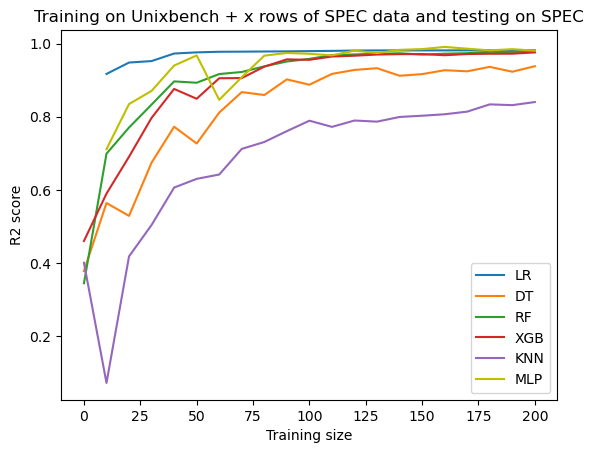

In [76]:
plt.plot(range(10, 201, jmp), score1[10//10:, 0], label=models[0])
for model in range(1, 5):
    plt.plot(range(l, 201, jmp), score1[l//10:, model], label=models[model])
plt.plot(range(10, 201, jmp), score1[10//10:, 5], label=models[5], color='y')
plt.legend()
plt.title('Training on Unixbench + x rows of SPEC data and testing on SPEC')
plt.xlabel('Training size')
plt.ylabel('R2 score')
plt.show()

In [175]:
score1[:5, 0]    # 30 rows for MLP

array([-746.8775923 ,    0.91685205,    0.94805253,    0.95206458,
          0.9727223 ])

In [158]:
# Train on SPEC (for cross only) + 'x' rows of Unix, test on remaining Unix for MLP
lo, hi, jmp = 10, 801, 10             # training size range
iters = (hi-lo-1)//jmp + 1
score75 = np.zeros((iters, 2))    # 0=self, 1=cross
mae75 = np.zeros((iters, 2))
mse75 = np.zeros((iters, 2))

indices = np.arange(X7.shape[0])
train_idx, test_idx = np.zeros((0), dtype=np.int8), indices
for trs in range(iters):
    trainpool_idx, test_idx = train_test_split(test_idx, train_size=jmp)
    train_idx = np.concatenate((train_idx, trainpool_idx))
    X75_train, y75_train = np.concatenate((X, X7[train_idx])), np.concatenate((y, y7[train_idx]))
    X75_test, y75_test = X7[test_idx], y7[test_idx]
    X_scaler, y_scaler = StandardScaler().fit(X75_train), StandardScaler().fit(y75_train)
    X75_train = np.concatenate((X_scaler.transform(X75_train), np.concatenate((df.iloc[:,-1:], df7.iloc[train_idx,-10:-9]))), axis=1)
    X75_test   = np.concatenate((X_scaler.transform(X75_test)  , df7.iloc[test_idx,-10:-9]), axis=1)
    y75_train, y75_test = y_scaler.transform(y75_train), y_scaler.transform(y75_test)
    
    X7_train, y7_train = X7[train_idx], y7[train_idx]
    X7_test, y7_test = X7[test_idx], y7[test_idx]
    X_scaler, y_scaler = StandardScaler().fit(X7_train), StandardScaler().fit(y7_train)
    X7_train   = np.concatenate((X_scaler.transform(X7_train), df7.iloc[train_idx,-9:]), axis=1)
    X7_test   = np.concatenate((X_scaler.transform(X7_test)  , df7.iloc[test_idx,-9:]), axis=1)
    y7_train, y7_test = y_scaler.transform(y7_train), y_scaler.transform(y7_test)
    print(X75_train.shape[0], X7_train.shape[0], X75_test.shape[0])

    e0 = MLPRegressor().fit(X7_train, y7_train.ravel())      #self
    e1 = estimator[5].fit(X75_train, y75_train.ravel())    #cross
    score75[trs][0] = e0.score(X7_test, y7_test)
    score75[trs][1] = e1.score(X75_test, y75_test)
    y7_pred, y75_pred = e0.predict(X7_test), e1.predict(X75_test)
    mae75[trs][0] = mean_absolute_error(y_true=y7_test, y_pred=y7_pred)
    mse75[trs][0] = mean_squared_error(y_true=y7_test, y_pred=y7_pred)
    mae75[trs][1] = mean_absolute_error(y_true=y75_test, y_pred=y75_pred)
    mse75[trs][1] = mean_squared_error(y_true=y75_test, y_pred=y75_pred)

4840 10 883
4850 20 873
4860 30 863
4870 40 853
4880 50 843
4890 60 833
4900 70 823
4910 80 813
4920 90 803
4930 100 793
4940 110 783
4950 120 773
4960 130 763
4970 140 753
4980 150 743
4990 160 733
5000 170 723
5010 180 713
5020 190 703
5030 200 693
5040 210 683
5050 220 673
5060 230 663
5070 240 653
5080 250 643
5090 260 633
5100 270 623
5110 280 613
5120 290 603
5130 300 593
5140 310 583
5150 320 573
5160 330 563
5170 340 553
5180 350 543
5190 360 533
5200 370 523
5210 380 513
5220 390 503
5230 400 493
5240 410 483
5250 420 473
5260 430 463
5270 440 453
5280 450 443
5290 460 433
5300 470 423
5310 480 413
5320 490 403
5330 500 393
5340 510 383
5350 520 373
5360 530 363
5370 540 353
5380 550 343
5390 560 333
5400 570 323
5410 580 313
5420 590 303
5430 600 293
5440 610 283
5450 620 273
5460 630 263
5470 640 253
5480 650 243
5490 660 233
5500 670 223
5510 680 213
5520 690 203
5530 700 193
5540 710 183
5550 720 173
5560 730 163
5570 740 153
5580 750 143
5590 760 133
5600 770 123
5610 780

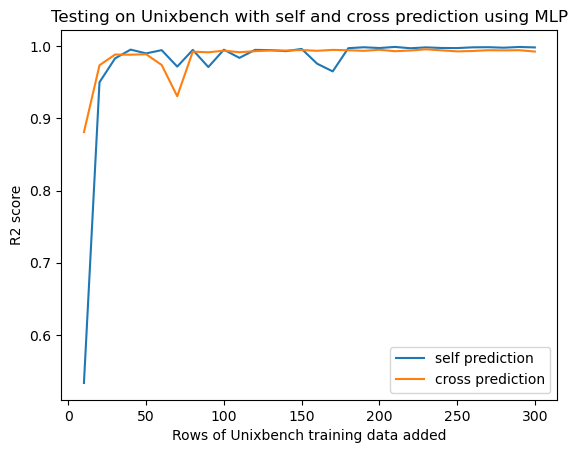

In [176]:
s=10
c=10
plt.plot(range(s, 301, jmp), score75[s//jmp-1:30, 0], label='self prediction')
plt.plot(range(c, 301, jmp), score75[c//jmp-1:30, 1], label='cross prediction')
plt.legend()
plt.title('Testing on Unixbench with self and cross prediction using MLP')
plt.xlabel('Rows of Unixbench training data added')
plt.ylabel('R2 score')
plt.show()